In [1]:
import math
import matplotlib.pyplot as plt
import datetime
import pandas as pd

In [2]:
cityMetadata = pd.read_csv('./raw_data/FIXO/municipios.csv', sep=',')
print(cityMetadata.head(10))

   Codigo do Municipio      Nome do Municipio  UF
0              1100015  Alta Floresta D'Oeste  RO
1              1100023              Ariquemes  RO
2              1100031                 Cabixi  RO
3              1100049                 Cacoal  RO
4              1100056             Cerejeiras  RO
5              1100064      Colorado do Oeste  RO
6              1100072             Corumbiara  RO
7              1100080          Costa Marques  RO
8              1100098        Espigão D'Oeste  RO
9              1100106          Guajará-Mirim  RO


In [3]:
cityMetadata.groupby(['UF'], axis=0)['Codigo do Municipio'].count()

UF
AC     22
AL    102
AM     62
AP     16
BA    417
CE    184
DF      1
ES     78
GO    246
MA    217
MG    853
MS     78
MT    141
PA    143
PB    223
PE    185
PI    224
PR    399
RJ     92
RN    167
RO     52
RR     15
RS    496
SC    293
SE     75
SP    645
TO    139
Name: Codigo do Municipio, dtype: int64

In [4]:
#Some helper methods:
def getLatestYear(df):
    return "2014"
    now = datetime.datetime.now()
    STARTING_YEAR = 2008
    CURRENT_YEAR = now.year
    latestYearStr = -1
    columnNames = list(df)
    for year in reversed(range(STARTING_YEAR, CURRENT_YEAR)):
        yearStr = str(year)
        if yearStr in columnNames:
            latestYearStr = yearStr
            return latestYearStr
    return None
        
def plotDataFrameHist(dataframe, dataframeName, isXAxisLogBased = False):
    dataFrame2Plot = dataframe
    if (isXAxisLogBased):
        dataFrame2Plot = dataframe.apply(lambda x: math.log10(x))
    dataFrame2Plot.hist(bins=50)
    titleStr = ("Log " if isXAxisLogBased else "") + dataframeName
    xLabelStr = titleStr + " da Cidade"
    yLabelStr = "Numero de Cidades"
    plt.title(titleStr)
    plt.xlabel(xLabelStr)
    plt.ylabel(yLabelStr)
    plt.show()

In [5]:
cityPopulation = pd.read_csv('./raw_data/FIXO/populacao.tsv', sep='\t')
cityPopulation = cityPopulation.drop(['2011'], axis=1) # one missing entry
print(cityPopulation.head(10))

   Código do Município   2012    2013    2014    2015
0              1100015  24069   25728   25652   25578
1              1100023  92747  101269  102860  104401
2              1100031   6132    6495    6424    6355
3              1100049  79330   85863   86556   87226
4              1100056  16852   18041   18013   17986
5              1100064  18093   19190   19001   18817
6              1100072   8530    9036    8938    8842
7              1100080  14355   15853   16258   16651
8              1100098  29189   31699   32047   32385
9              1100106  42202   45761   46203   46632


In [6]:
cityPopulation.describe()

,Código do Município,2012,2013,2014,2015
count,5.565000e+03,5.565000e+03,5.565000e+03,5.565000e+03,5.565000e+03
mean,3.253053e+06,3.485652e+04,3.612194e+04,3.643392e+04,3.673624e+04
std,9.845215e+05,2.057822e+05,2.127513e+05,2.142414e+05,2.156927e+05
min,1.100015e+06,8.070000e+02,8.250000e+02,8.220000e+02,8.180000e+02
25%,2.512101e+06,5.254000e+03,5.404000e+03,5.430000e+03,5.458000e+03
50%,3.146206e+06,1.104200e+04,1.139200e+04,1.144900e+04,1.151500e+04
75%,4.119004e+06,2.374800e+04,2.461300e+04,2.476800e+04,2.499300e+04
max,5.300108e+06,1.137668e+07,1.182187e+07,1.189589e+07,1.196782e+07


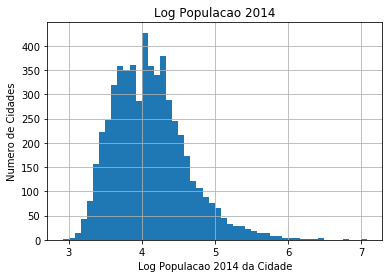

In [7]:
plotDataFrameHist(cityPopulation[getLatestYear(cityPopulation)], "Populacao " + getLatestYear(cityPopulation), isXAxisLogBased = True)

In [8]:
cityPIB = pd.read_csv('./raw_data/FIXO/pib.tsv', sep='\t')
cityPIB = cityPIB.drop(['2008'], axis=1) # one missing entry
print(cityPIB.head(10))

   Código do Município        2009        2010        2011        2012  \
0              1100015   305787952   335699677   348804371   383885476   
1              1100023  1041016954  1293582981  1561170194  1537869867   
2              1100031   104587877    99413204   117396029   162481926   
3              1100049   908920362  1168598490  1274121391  1324657401   
4              1100056   237950838   272455593   336194421   443765180   
5              1100064   212200949   226199733   238810781   255338915   
6              1100072   192822294   195072804   261379437   319419655   
7              1100080   120084640   135446440   150581945   166583937   
8              1100098   319670909   366780750   425903197   398482670   
9              1100106   489996212   650329204   820547724   786513751   

         2013        2014  
0   340407000   379060308  
1  1778919000  1967587044  
2    96308000   113031481  
3  1415053000  1695899981  
4   341314000   326765671  
5   242168000   2

In [9]:
cityPIB.describe()

,Código do Município,2009,2010,2011,2012,2013,2014
count,5.565000e+03,5.565000e+03,5.565000e+03,5.565000e+03,5.565000e+03,5.565000e+03,5.565000e+03
mean,3.253053e+06,5.821032e+08,6.774636e+08,7.444768e+08,7.892352e+08,9.552098e+08,1.038297e+09
std,9.845215e+05,6.319017e+09,7.199768e+09,7.850044e+09,8.167306e+09,9.506898e+09,1.038009e+10
min,1.100015e+06,5.766740e+06,7.217226e+06,9.838036e+06,8.342569e+06,9.678000e+06,1.167510e+07
25%,2.512101e+06,3.861528e+07,4.461285e+07,4.934961e+07,5.243891e+07,5.925000e+07,6.423790e+07
50%,3.146206e+06,8.113628e+07,9.339894e+07,1.030712e+08,1.097338e+08,1.301470e+08,1.427285e+08
75%,4.119004e+06,2.081084e+08,2.386932e+08,2.653218e+08,2.819383e+08,3.437950e+08,3.786176e+08
max,5.300108e+06,3.892849e+11,4.435176e+11,4.821281e+11,4.993754e+11,5.707062e+11,6.280649e+11


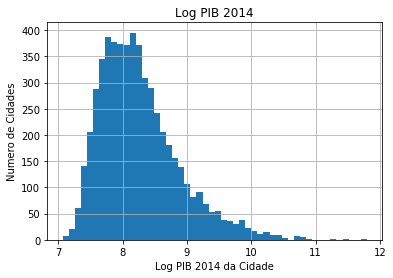

In [10]:
plotDataFrameHist(cityPIB[getLatestYear(cityPIB)], "PIB " + getLatestYear(cityPIB), isXAxisLogBased = True)

In [11]:
cityRendaMedia = pd.read_csv('./raw_data/FIXO/renda_media.tsv', sep='\t')
# cityRendaMedia = pd.read_csv('./raw_data/FIXO/renda_media.tsv', sep='\t', converters={'2009':int64})
print(cityRendaMedia.head(10))

   Código do Município     2009     2010     2011     2012     2013     2014
0              1100015   892.92   998.03  1122.35  1196.18  1125.91  1409.42
1              1100023  1011.48  1121.92  1232.81  1278.16  1423.20  1490.65
2              1100031   905.65   971.17  1086.92  1183.74  1258.31  1285.64
3              1100049  1016.64  1094.86  1255.51  1599.84  1494.76  1533.24
4              1100056   909.28   951.82  1057.99  1200.41  1399.36  1456.51
5              1100064   979.54   914.90   992.16  1058.23  1213.95  1305.01
6              1100072   907.44   989.29  1145.49  1182.00  1314.74  1430.71
7              1100080   870.50   826.84  1268.53  1098.64  1185.99  1333.96
8              1100098   883.74  1029.49  1081.98  1197.75  1280.77  1378.26
9              1100106  1062.93  1180.31  1218.17  1374.49  1419.74  1505.42


In [12]:
cityRendaMedia.describe()

,Código do Município,2009,2010,2011,2012,2013,2014
count,5.565000e+03,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000
mean,3.253053e+06,908.086609,998.643387,1114.409279,1214.343714,1356.832751,1472.056656
std,9.845215e+05,281.331983,302.717138,326.755013,376.707387,379.008356,400.824990
min,1.100015e+06,0.000000,0.000000,39.570000,19.380000,133.180000,331.940000
25%,2.512101e+06,737.960000,818.320000,914.720000,1003.370000,1126.400000,1219.930000
50%,3.146206e+06,858.750000,941.670000,1054.860000,1151.220000,1292.000000,1398.880000
75%,4.119004e+06,1010.490000,1106.830000,1229.760000,1345.100000,1490.700000,1624.130000
max,5.300108e+06,5270.130000,5329.100000,4991.250000,6112.470000,6820.720000,5693.760000


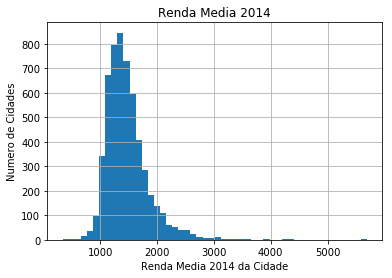

In [13]:
plotDataFrameHist(cityRendaMedia[getLatestYear(cityRendaMedia)], "Renda Media " + getLatestYear(cityRendaMedia))

In [14]:
#Correlation between the series for 2014
cityPopulationLastYear = cityPopulation[getLatestYear(cityPopulation)]
cityPIBLastYear = cityPIB[getLatestYear(cityPIB)]
cityRendaMediaLastYear = cityRendaMedia[getLatestYear(cityRendaMedia)]

print("Correlation Population, PIB\n", cityPopulationLastYear.corr(cityPIBLastYear))
print("Correlation Population, Renda Media\n", cityPopulationLastYear.corr(cityRendaMediaLastYear))
print("Correlation PIB, Renda Media\n", cityPIBLastYear.corr(cityRendaMediaLastYear))

# Comment: PIB e Populacao tem uma grande correlacao ~0.96

Correlation Population, PIB
 0.964844768203
Correlation Population, Renda Media
 0.228116176574
Correlation PIB, Renda Media
 0.225084784923


In [15]:
# Adding a derived series cityPIBOverPop
cityPIBOverPop = cityPIBLastYear / cityPopulationLastYear
print("Correlation PIB/Pop, Population\n", cityPopulationLastYear.corr(cityPIBOverPop))
print("Correlation PIB/Pop, PIB\n", cityPIBLastYear.corr(cityPIBOverPop))
print("Correlation PIB/Pop, Renda Media\n", cityRendaMediaLastYear.corr(cityPIBOverPop))

Correlation PIB/Pop, Population
 0.079111288933
Correlation PIB/Pop, PIB
 0.125025947316
Correlation PIB/Pop, Renda Media
 0.476156561185


In [16]:
# converting state categorical to vectorized binary form AC: 0, AL:0, ... SP:1, ...TO:0
cityStateMatrix = pd.get_dummies(cityMetadata['UF'])
cityStateMatrix.head(3)

,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [17]:
print("Correlation States, Population\n", cityStateMatrix.corrwith(cityPopulationLastYear))
print("Correlation States, PIB\n", cityStateMatrix.corrwith(cityPIBLastYear))
print("Correlation States, RendaMedia\n", cityStateMatrix.corrwith(cityRendaMediaLastYear))
print("Correlation States, PIB/Pop\n", cityStateMatrix.corrwith(cityPIBOverPop))

Correlation States, Population
 AC   -0.000153
AL   -0.002467
AM    0.012905
AP    0.002631
BA   -0.000212
CE    0.010035
DF    0.176224
ES    0.007444
GO   -0.009955
MA   -0.004573
MG   -0.024085
MS   -0.001621
MT   -0.010210
PA    0.015265
PB   -0.017881
PE    0.011873
PI   -0.021196
PR   -0.011235
RJ    0.086240
RN   -0.013156
RO   -0.001273
RR   -0.000802
RS   -0.020216
SC   -0.014909
SE   -0.003732
SP    0.053812
TO   -0.019175
dtype: float64
Correlation States, PIB
 AC   -0.002589
AL   -0.008381
AM    0.003677
AP   -0.001039
BA   -0.013746
CE   -0.006293
DF    0.253672
ES    0.007039
GO   -0.007615
MA   -0.013278
MG   -0.017735
MS   -0.000351
MT   -0.004976
PA   -0.002639
PB   -0.015766
PE   -0.003568
PI   -0.017164
PR   -0.004442
RJ    0.078148
RN   -0.012113
RO   -0.003592
RR   -0.001947
RS   -0.009553
SC   -0.004798
SE   -0.006066
SP    0.064280
TO   -0.013106
dtype: float64
Correlation States, RendaMedia
 AC   -0.007055
AL   -0.047087
AM   -0.032097
AP    0.034818
BA   -0.100